# Cumulative Loss VS Cumulative Communication

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import ipywidgets as widgets
from ipywidgets import Layout
import os
import operator

In [2]:
plt.rcParams["figure.figsize"] = (16,8)

In [3]:
dirs = [d for d in sorted(os.listdir('.')) if os.path.isdir(d)]
wFolders = widgets.SelectMultiple(
    options=dirs,
    #value=['Oranges'],
    rows=10,
    description='Experiments:',
    disabled=False,
    layout=Layout(width='550px')
)
display(wFolders)

SelectMultiple(description='Experiments:', layout=Layout(width='550px'), options=('.ipynb_checkpoints', 'Radon…

In [4]:
experimentFolders = list(wFolders.value)

In [5]:
# collect descriptions of experiments
experiments = {}
for d in experimentFolders:
    expSummary = open(os.path.join(d,"summary.txt")).read()
    for l in expSummary.split("\n"):
        if "Sync:" in l:
            sync = l.split("\t")[-1]
        elif "Learner:" in l:
            learnerSpec = l.split("\t")[-1]
        elif "Number of Nodes:" in l:
            nodesNumber = int(l.split("\t")[-1])
    # form description of the synchronization method in the experiment
    for e in learnerSpec.split(","):
        if "batchSize" in e:
            batchSize = int(e.replace(")","").replace("(","").split("=")[-1])
        elif "syncPeriod" in e:
            syncPeriod = int(e.replace(")","").replace("(","").split("=")[-1])
        elif "delta" in e:
            delta = e.replace(")","").replace("(","").split("=")[-1]
            if 'None' in delta:
                delta = None
            else:
                delta = float(delta)
    if nodesNumber == 1:
        sync = "serial (B=" + str(batchSize) + ")"
    elif "Dynamic" in sync:
        if "hedge" in sync:
            sync = "dynamic hedge"
        else:
            sync = "dynamic"
        sync += " (B=" + str(batchSize) + ", b=" + str(syncPeriod) + ", $\Delta$=" + str(delta) + ")"
    elif "Periodic" in sync:
        sync = "periodic (B=" + str(batchSize) + ", b=" + str(syncPeriod) + ")"
    elif "No sync" in sync:
        sync = "no sync (B=" + str(batchSize) + ")"
        
    experiments[d] = [sync]
print(experiments)

{'RadonMachine_test_2020-08-11_21-46-58': ['Aggregation-at-the-end synchronization']}


In [6]:
for d in experimentFolders:
    cumulativeCommunication = 0
    for f in os.listdir(os.path.join(d, "coordinator", "communication")):
        f = open(os.path.join(d, "coordinator", "communication", f), "r")
        for l in f.readlines():
            parsedLine = l[:-1].split("\t")
            if len(parsedLine) == 5:
                messagesAmount = parsedLine[2].count(".")
                cumulativeCommunication += float(parsedLine[3]) * messagesAmount
            else:
                cumulativeCommunication += float(parsedLine[4])
        f.close()
    experiments[d].append(cumulativeCommunication)
print(experiments)

{'RadonMachine_test_2020-08-11_21-46-58': ['Aggregation-at-the-end synchronization', 4902.0]}


In [7]:
for d in experimentFolders:
    cumulativeLoss = 0
    dirs = [wd for wd in os.listdir(d) if os.path.isdir(os.path.join(d,wd))]
    for wd in dirs:
        if 'worker' in wd:
            f = open(os.path.join(d, wd, "losses.txt"), "r")
            for l in f.readlines():
                cumulativeLoss += float(l[:-1].split('\t')[1])
            f.close()
    experiments[d].append(cumulativeLoss)
experiments_dict = experiments
experiments = sorted(experiments.items(), key=operator.itemgetter(1))
print(experiments)

[('RadonMachine_test_2020-08-11_21-46-58', ['Aggregation-at-the-end synchronization', 4902.0, 2.741])]


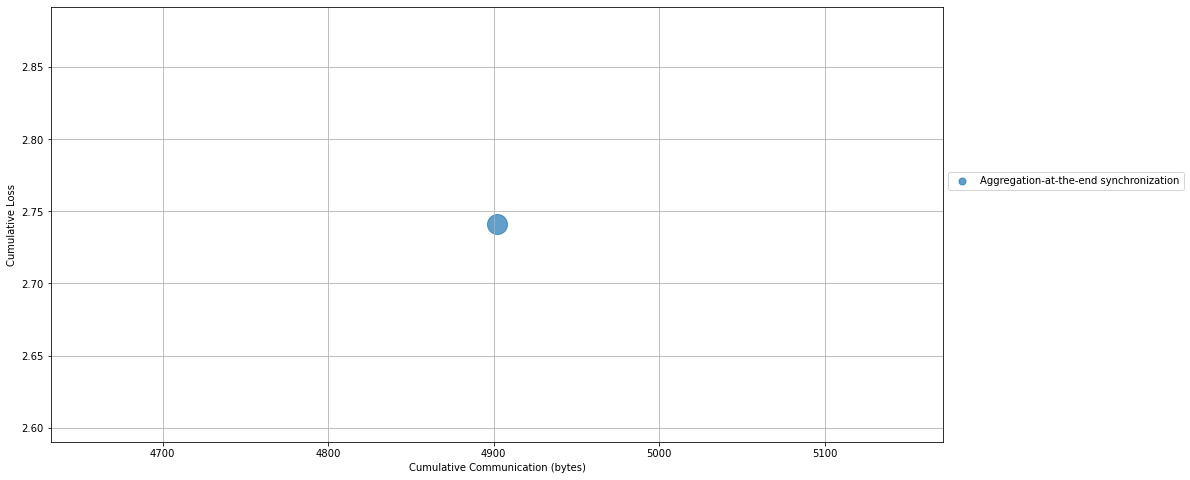

In [8]:
fig = plt.figure()
for e in experiments:
    if "no sync" in e[1][0]:
        plt.axhline(e[1][2], color = 'black', linestyle = '-', label = e[1][0])
    elif "serial" in e[1][0]:
        plt.axhline(e[1][2], color = 'black', linestyle = '-.', label = e[1][0])
    else:
        if "dynamic" in e[1][0]:
            marker = '*'
        elif "periodic" in e[1][0]:
            marker = 's'
        plt.scatter(e[1][1], e[1][2], label = e[1][0], marker = 'o', s = 400, alpha = 0.7)
plt.ylabel("Cumulative Loss")
plt.xlabel("Cumulative Communication (bytes)")
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.6), markerscale = 0.35)
plt.show()

fig.savefig('performance.png', dpi=100, bbox_inches='tight')

Way to display driving evaluation

In [9]:
experiments_dict['deepDrivingExp_2018-12-04 09-45-56'][2] = 1
experiments_dict.pop('deepDrivingExp_2018-12-04 12-25-34')

KeyError: 'deepDrivingExp_2018-12-04 09-45-56'

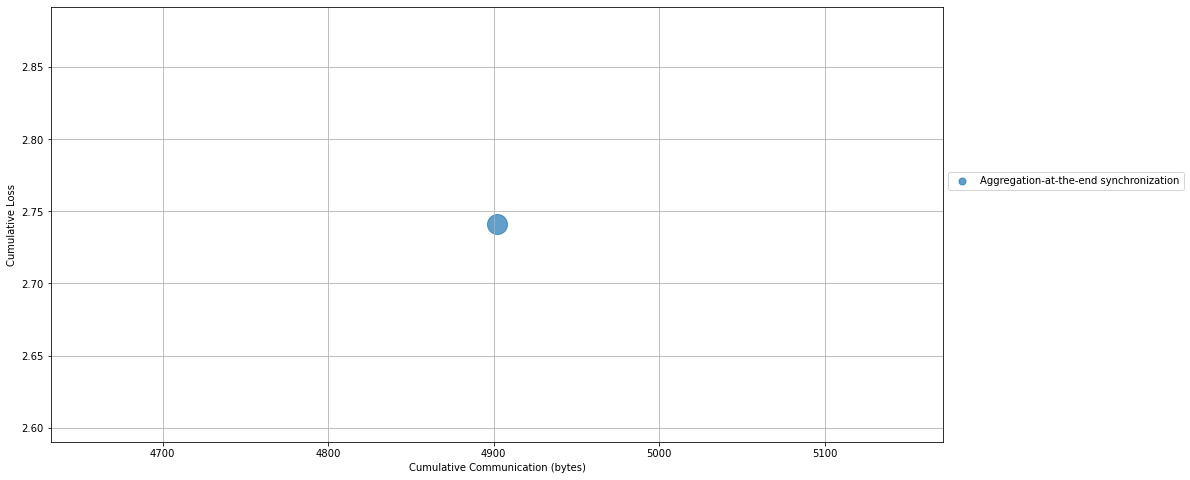

In [10]:
experiments = sorted(experiments_dict.items(), key=operator.itemgetter(1))

fig = plt.figure()
for e in experiments:
    if "no sync" in e[1][0]:
        plt.axhline(e[1][2], color = 'black', linestyle = '-', label = e[1][0])
    elif "serial" in e[1][0]:
        plt.axhline(e[1][2], color = 'black', linestyle = '-.', label = e[1][0])
    else:
        if "dynamic" in e[1][0]:
            marker = '*'
        elif "periodic" in e[1][0]:
            marker = 's'
        plt.scatter(e[1][1], e[1][2], label = e[1][0], marker = 'o', s = 400, alpha = 0.7)
plt.ylabel("Cumulative Loss")
plt.xlabel("Cumulative Communication (bytes)")
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.6), markerscale = 0.35)
plt.show()